In [6]:
import sys
# sys.path.insert(0, '..')

import collections
import re
with open('35.txt', 'r') as f:
    lines = f.readlines()
    raw_dataset = [re.sub('[^A-Za-z]+', ' ', st).lower().split()
                   for st in lines]

# Let's read the first 10 lines of the text
for st in raw_dataset[8:10]:
    print('# tokens:', len(st), st)

# tokens: 13 ['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him']
# tokens: 12 ['was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and']


In [8]:
counter = collections.Counter([tk for st in raw_dataset for tk in st])
print("frequency of 'traveller':", counter['traveller'])
# Print the 10 most frequent words with word frequency count
print(counter.most_common(10))

frequency of 'traveller': 61
[('the', 2434), ('and', 1312), ('of', 1269), ('i', 1267), ('a', 874), ('to', 775), ('in', 598), ('was', 553), ('that', 458), ('it', 449)]


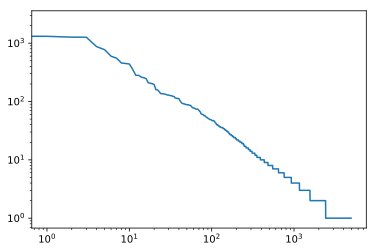

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

wordcounts = [count for _,count in counter.most_common()]
plt.loglog(wordcounts);

In [12]:
wseq = [tk for st in raw_dataset for tk in st]
word_pairs = [pair for pair in zip(wseq[:-1], wseq[1:])]
print('Beginning of the book\n', word_pairs[:10])
counter_pairs = collections.Counter(word_pairs)
print('Most common word pairs\n', counter_pairs.most_common(10))

Beginning of the book
 [('the', 'time'), ('time', 'machine'), ('machine', 'by'), ('by', 'h'), ('h', 'g'), ('g', 'wells'), ('wells', 'i'), ('i', 'the'), ('the', 'time'), ('time', 'traveller')]
Most common word pairs
 [(('of', 'the'), 334), (('in', 'the'), 184), (('i', 'had'), 130), (('and', 'the'), 112), (('i', 'was'), 112), (('the', 'time'), 104), (('to', 'the'), 101), (('it', 'was'), 99), (('project', 'gutenberg'), 84), (('as', 'i'), 78)]


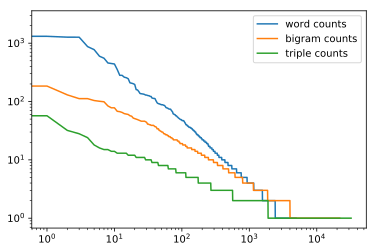

In [14]:
word_triples = [triple for triple in zip(wseq[:-2], wseq[1:-1], wseq[2:])]
counter_triples = collections.Counter(word_triples)
bigramcounts = [count for _,count in counter_pairs.most_common()]
triplecounts = [count for _,count in counter_triples.most_common()]
plt.loglog(wordcounts, label='word counts');
plt.loglog(bigramcounts, label='bigram counts');
plt.loglog(triplecounts, label='triple counts');
plt.legend();

In [17]:
counter_triples.most_common(20)

[(('the', 'time', 'traveller'), 59),
 (('project', 'gutenberg', 'tm'), 57),
 (('the', 'time', 'machine'), 32),
 (('the', 'project', 'gutenberg'), 28),
 (('the', 'medical', 'man'), 24),
 (('gutenberg', 'tm', 'electronic'), 18),
 (('it', 'seemed', 'to'), 16),
 (('it', 'was', 'a'), 15),
 (('here', 'and', 'there'), 15),
 (('seemed', 'to', 'me'), 14),
 (('i', 'did', 'not'), 14),
 (('i', 'saw', 'the'), 13),
 (('i', 'began', 'to'), 13),
 (('project', 'gutenberg', 'literary'), 13),
 (('gutenberg', 'literary', 'archive'), 13),
 (('literary', 'archive', 'foundation'), 13),
 (('for', 'a', 'moment'), 12),
 (('said', 'the', 'time'), 12),
 (('out', 'of', 'the'), 12),
 (('i', 'could', 'see'), 12)]